<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Deep Learning From Scratch</h1>
        <h1>Simple Network</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

numpy     1.18.1
json      2.0.9
autopep8  1.5
pandas    1.0.1
seaborn   0.10.0
watermark 2.0.2
Fri Mar 27 2020 2020-03-27T12:24:47-04:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : fa4b4ee7b722c78c9c584fcc1d13d9c821b8dff2


In [3]:
plt.style.use('./d4sci.mplstyle')

## Load Dataset

In [4]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [5]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [6]:
X_train.shape

(5000, 784)

In [7]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [8]:
def init_weights(L_in, L_out):
    epsilon = 0.12

    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [9]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [10]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [11]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

In [12]:
one_hot(10, 2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

Activation function, just as before

In [13]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [14]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [15]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        a2 = np.concatenate(([1], sigmoid(z2)))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        a3 = sigmoid(z3)  # Output layer

        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [16]:
step = 0
tol = 1e-3
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []
alpha = 0.5

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= alpha*Theta1_grad
    Theta2 -= alpha*Theta2_grad

10 3.102752864061329 3.116709657245405 46.36 42.9
20 2.8703676648597654 2.901892079928045 57.98 55.1
30 2.5478950840301593 2.602096266798931 63.36000000000001 58.9
40 2.2299068154067143 2.3042228641353875 68.24 63.9
50 1.9760582639344375 2.0646759728998427 73.16 69.0
60 1.7808776515231122 1.8792975757756893 76.58 72.0
70 1.6258074072686823 1.7312939927871145 79.2 74.7
80 1.498421998538938 1.6094278733649894 81.34 77.10000000000001
90 1.3917419369426702 1.5074232368590619 82.96 78.7
100 1.3013410716814815 1.4212466139576712 84.48 80.10000000000001
110 1.2239462167794033 1.3478209471795326 85.48 80.7
120 1.1569958684447148 1.284664765777018 86.3 82.19999999999999
130 1.0984949770317525 1.2298051534895424 87.2 82.89999999999999
140 1.0469144092077267 1.1817140782595401 87.83999999999999 83.3
150 1.0010895899770111 1.139225668931857 88.36 84.39999999999999
160 0.9601266881862788 1.1014486972340505 88.72 85.2
170 0.9233261423066351 1.0676900582112245 88.98 85.7
180 0.8901260336772812 1.0373

## Accuracy during training

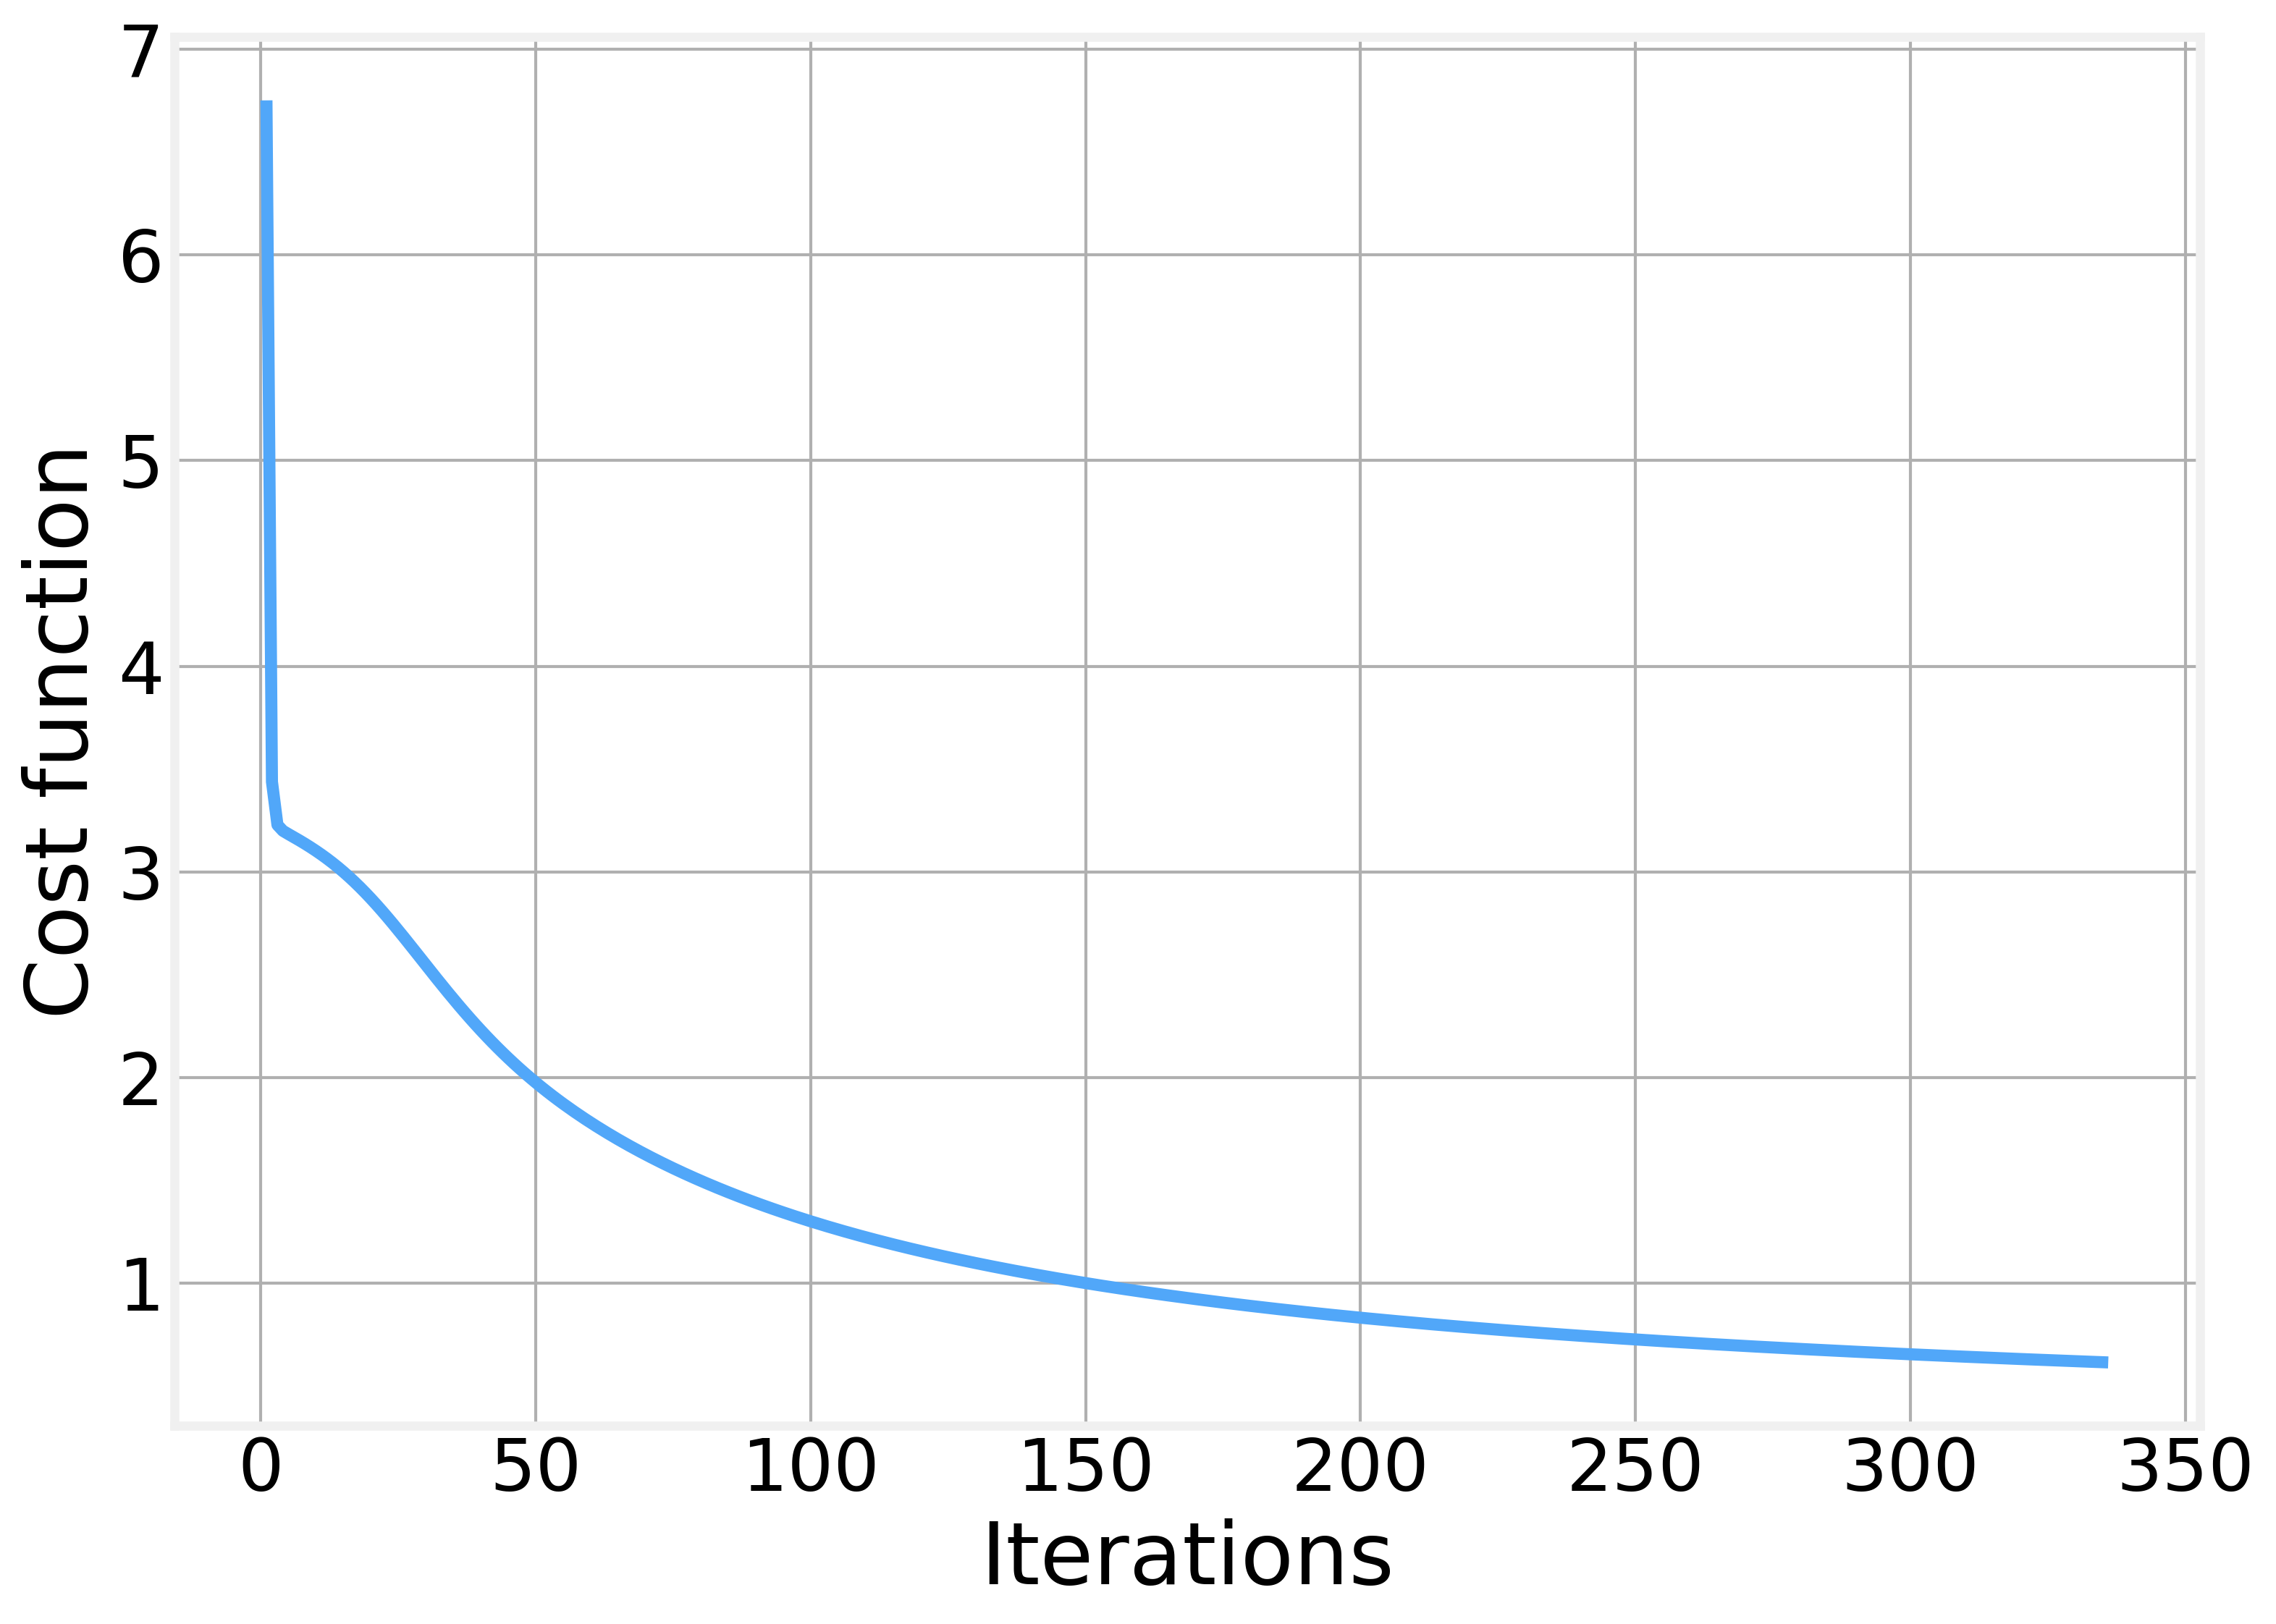

In [17]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.gcf().set_size_inches(11, 8)

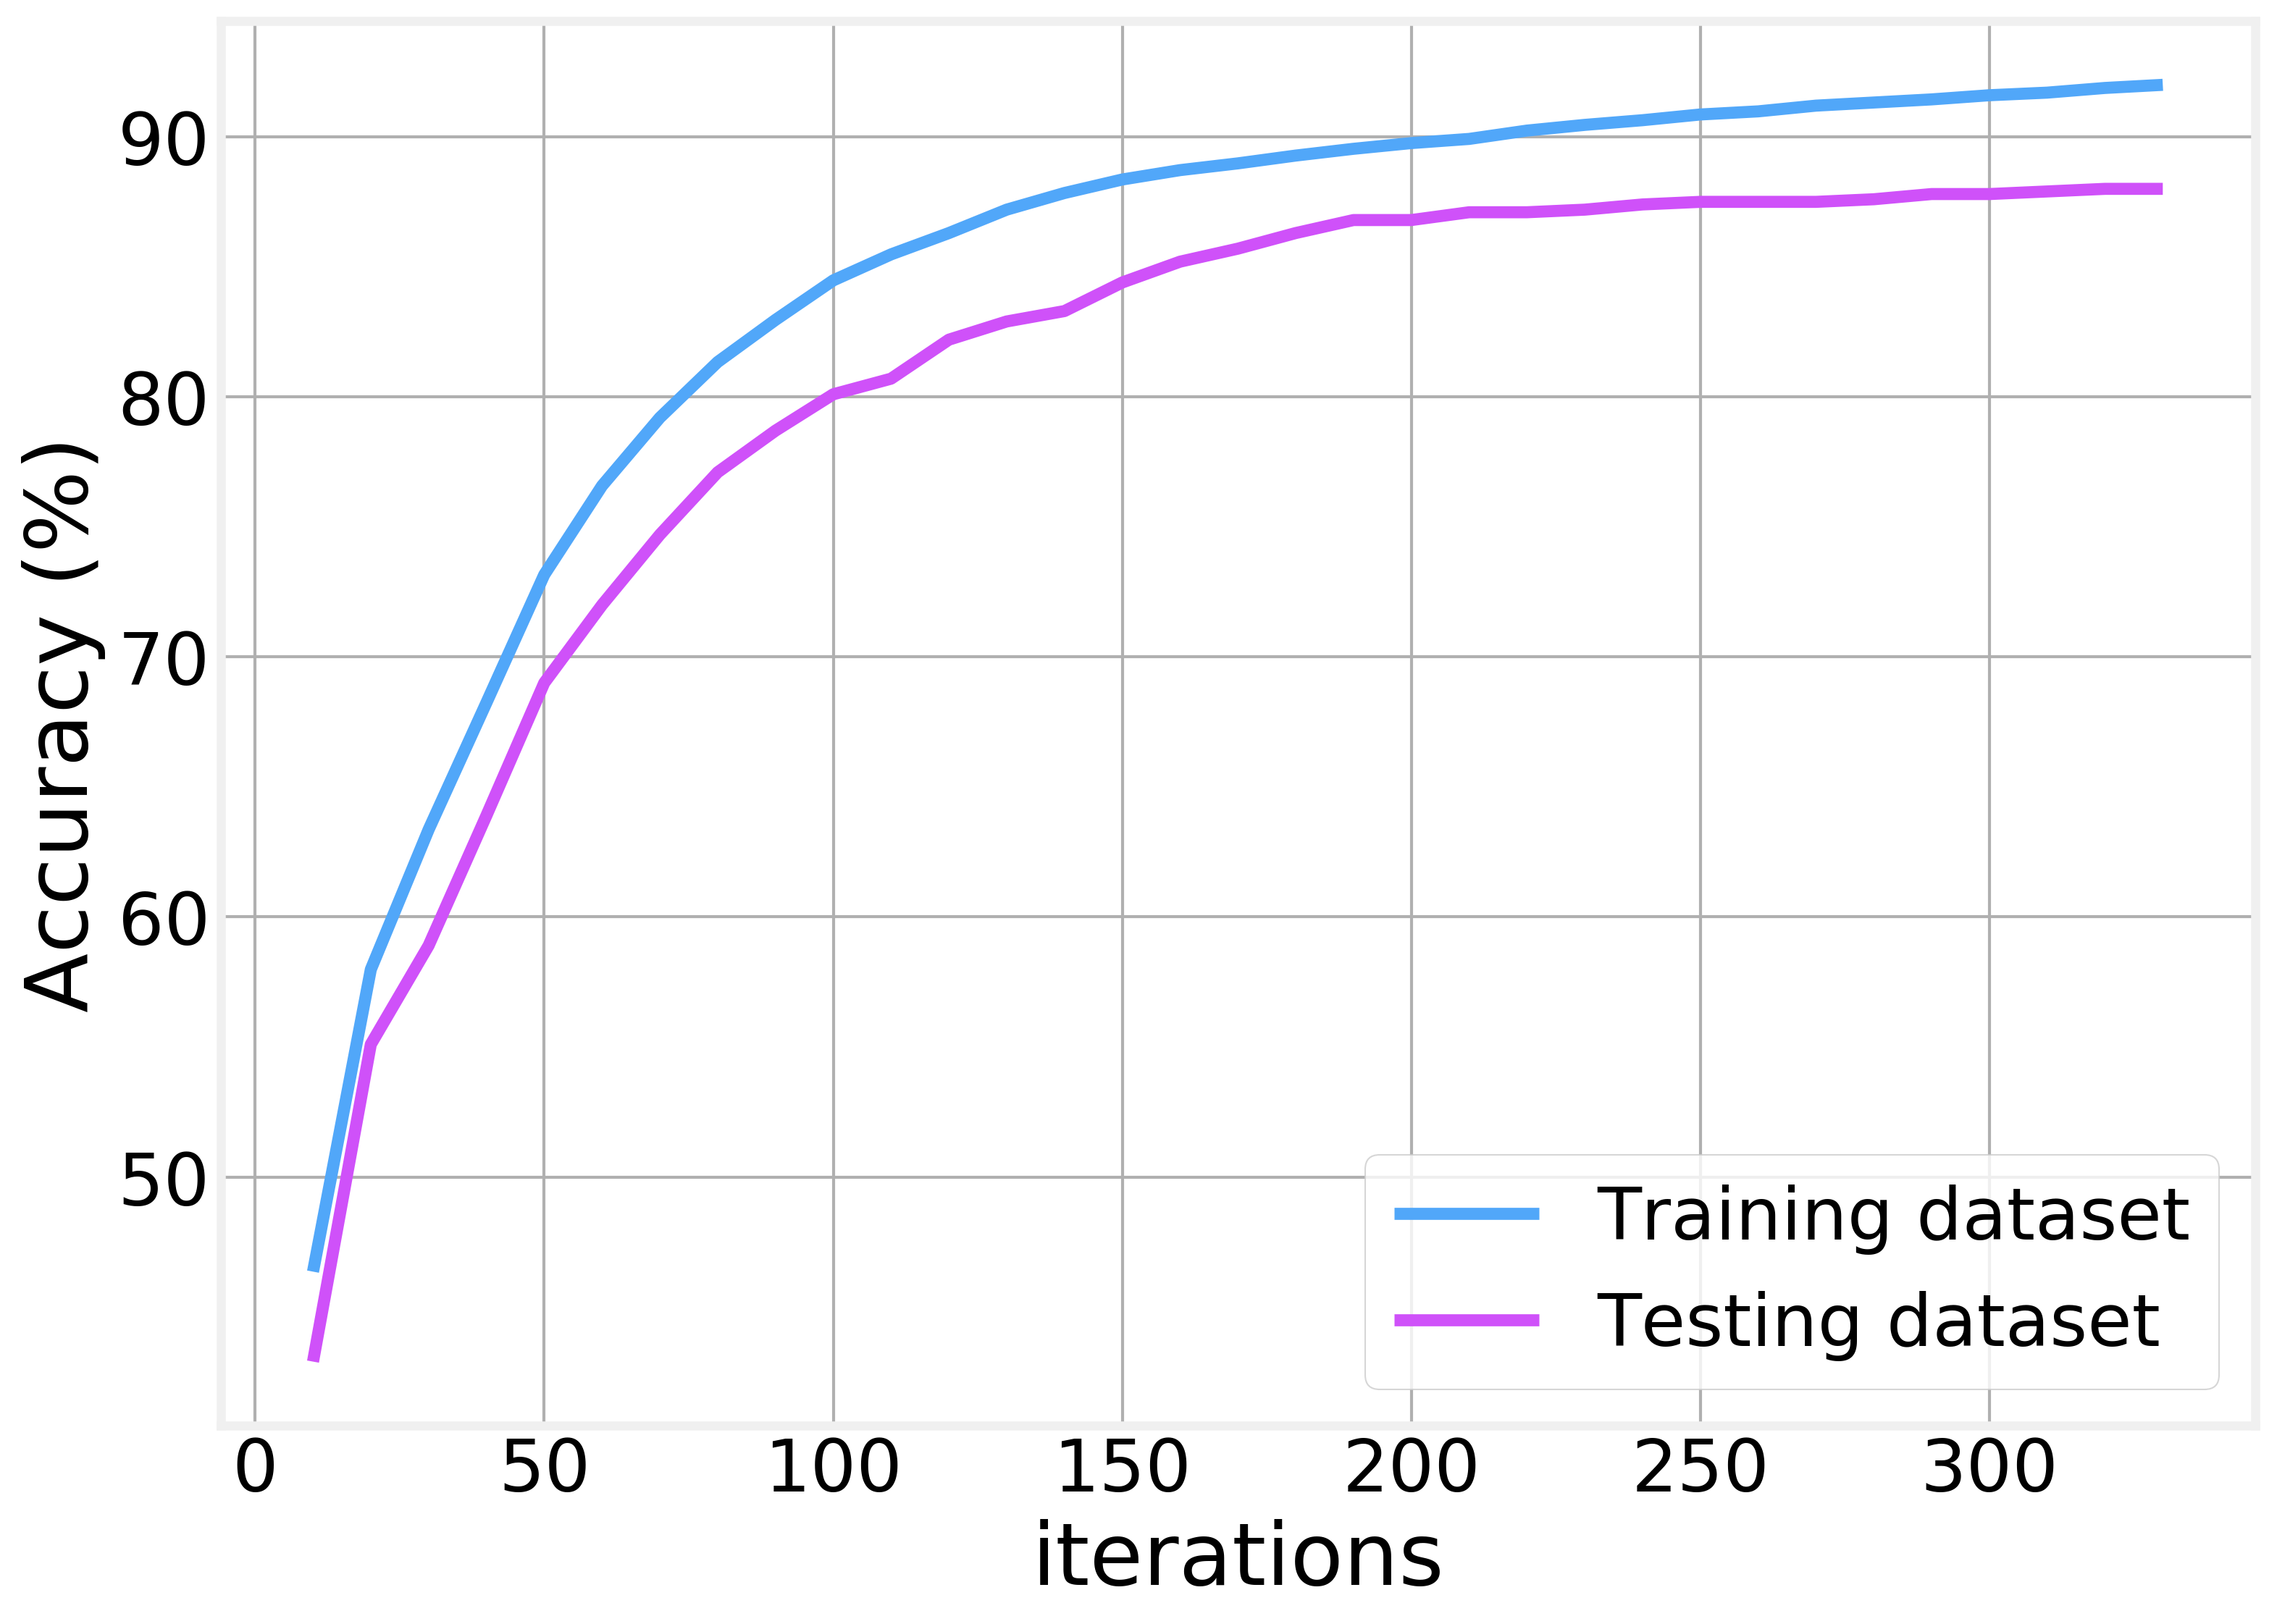

In [18]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Save the trained model

In [19]:
np.save('Theta1_short.npy', Theta1)
np.save('Theta2_short.npy', Theta2)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>